In [17]:
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("DataChallenge2019_GreenhouseGroup_Bidding_Algorithms_Tests.csv",sep=";") # reading original data

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [8]:
data_subset = data[["impressions_inview","impressions","clicks","buyer_bid"]]

data_subset["inview_per_imp"] = data_subset["impressions_inview"]/data_subset["impressions"]
data_subset["clicks_per_imp"] = data_subset["clicks"]/data_subset["impressions"]
data_subset["performance_per_eur"] = 1000*(data_subset["impressions_inview"]+data_subset["clicks"])/data_subset["buyer_bid"]

data_subset.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

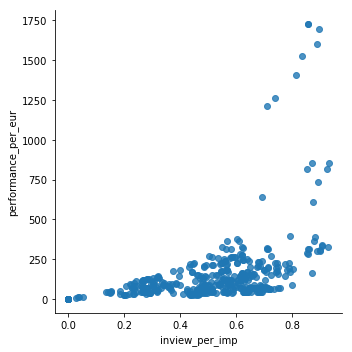

In [20]:
sns.lmplot(x="inview_per_imp",y="performance_per_eur",data=data_subset,fit_reg=True)
plt.show()

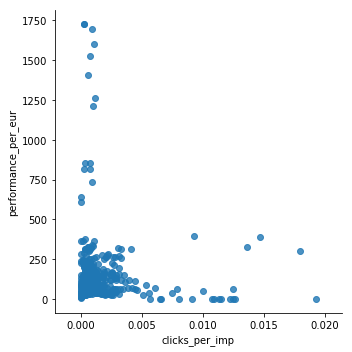

In [21]:
sns.lmplot(x="clicks_per_imp",y="performance_per_eur",data=data_subset,fit_reg=True)
plt.show()